# 基于朴素贝叶斯的世界杯胜负预测

### 想法起源：来自于上课所讲述的朴素贝叶斯算法，通过计算概率进行分类。

### 既然如此，我想到可以把胜负平看作类别（编码为1,0，-1），

### 把两只参赛队伍编码后作为条件（一个国家赋予一个编码）

### 就可以进行使用朴素贝叶斯计算进行分类与预报了

# PART1数据的收集与整理

### 数据来源于kaggle上的世界杯数据集（文件夹中的最早的原始数据.csv）
### 可以看到这个数据集之中包含了大量的有关于世界杯的数据（1930-2014）
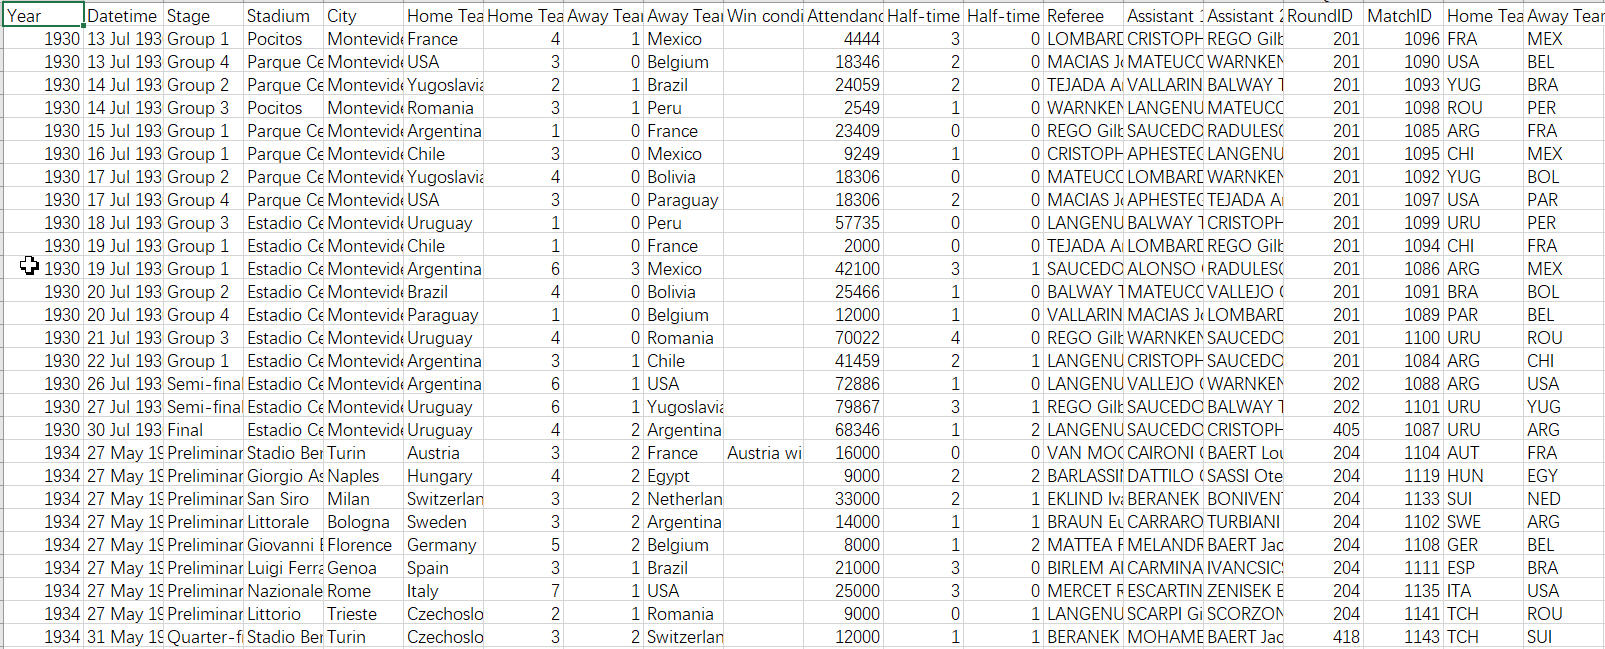
### 但是我所关心的只有参赛队伍与胜负情况，而且考虑到足球运动员的运动周期，只参考了1998年之后的所有世界杯
### 删去多余的数据，仅保留参赛队伍与胜负情况
### 使用excel的查找替换，将前面的队伍对后面的队伍赢的比赛记录为1，平的比赛记录为0，输的比赛记录为-1
### 然后将所有国家进行编码（对照表见文件夹中的国家序号对照表.txt）


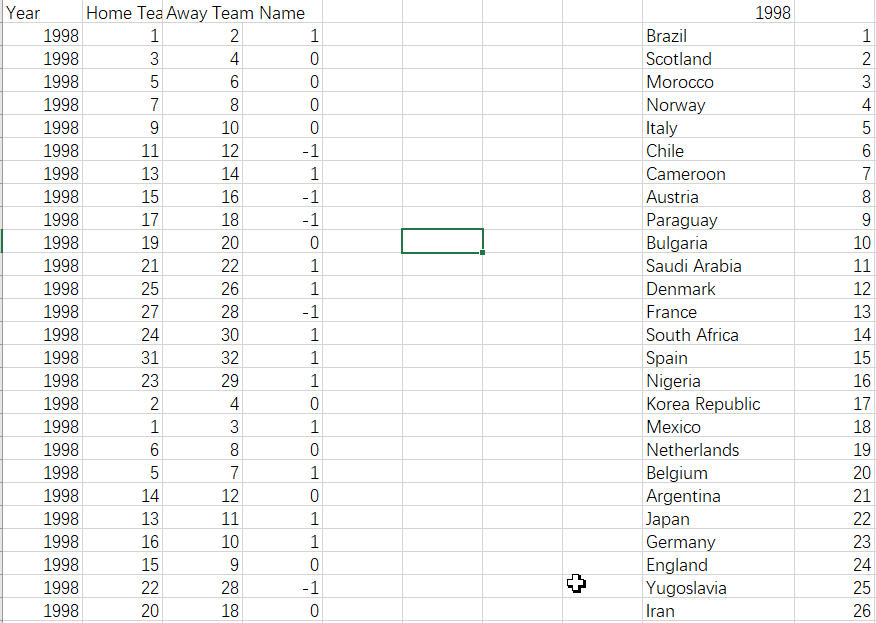

## 但这样产生了一个问题，胜负可能由国家前后的顺序改变，因此需要进一步处理

### 采用的解决办法是将两个国家顺序，因此胜负的编码也就相反，将这段处理后的数据拼接到前一段数据的后面

### 避免因为前后位置的摆放影响胜负结果，得到最终训练使用的数据（1.TXT）

## 前面两行为参赛队伍的编码，后面一行为前对后的胜负关系（胜1，平0，负-1）
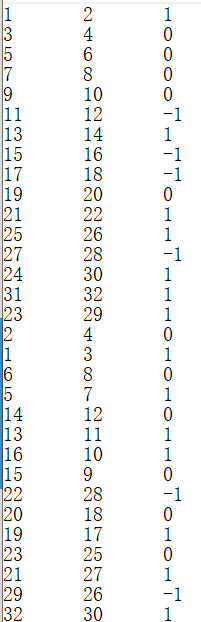

# 到这里数据就处理完毕！

 # PART2 建立模型

In [33]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
data=np.loadtxt(r"1.txt")
x=data[:,0:-1]#读入前两列
y=data[:,-1]#读入胜负结果
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(x, y)
bayes = GaussianNB()
model=bayes.fit(x, y)
pred = model.predict(data_test)
err=pred-target_test
count=[]
for i in err:
    if i==0:
        count.append(i)
rate=len(count)/len(err)*100
print("以自身作为预报的准确率{:.2f}".format(rate),"%")


以自身作为预报的准确率46.43 %


### 看起来模型的准确率低，可能的原因是小组赛里有的队伍就出现过一次，有时候发生爆冷，数据量不足，对于经常打入世界杯的传统强队来说，可能更加准确一些

# PART 3 下面以2018年俄罗斯世界杯的结果进行预测与验证（训练数据只到2014）
## 建模

In [19]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
data=np.loadtxt(r"C:\Users\cm\Desktop\1.txt")
x=data[:,0:-1]
y=data[:,-1]
bayes = GaussianNB()
model=bayes.fit(x, y)


# 八强战，具体的国家在注释上（俄罗斯东道主）

In [35]:
p1=[36,45]#乌拉圭，葡萄牙 1
p2=[13,21]#法国，阿根廷 1
p3=[1,18]#巴西，墨西哥 1
p4=[22,20]#日本，比利时
p5=[34,15]#俄罗斯，西班牙
p6=[28,12]#克罗地亚，丹麦
p7=[38,46]#瑞典，瑞士
p8=[32,24]#哥伦比亚，英格兰
px=[p1,p2,p3,p4,p5,p6,p7,p8]
result=[1,1,1,-1,1,1,1,-1]
preresult=[]
for i in px:
    xNew=np.array([i])
    pred = model.predict(xNew)
    pred=list(pred)
    preresult.append(pred)
preresult=list(np.ravel(preresult))
print(preresult)
print(result)
error=[preresult[i]-result[i] for i in range(len(result))]
count=[]
for i in error:
    if i==0:
        count.append(i)
rate=len(count)/len(error)*100
print(error)  # 误判率怎么求？不为0的就是误判
print("俄罗斯世界杯八强赛正确率{:.2f}".format(rate),"%")
    


[1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0]
[1, 1, 1, -1, 1, 1, 1, -1]
[0.0, 0.0, -2.0, 0.0, -2.0, -2.0, 0.0, 0.0]
俄罗斯世界杯八强赛正确率62.50 %


## 四强战 正确率100%

In [25]:
p1=[36,13]#乌拉圭，法国
p2=[1,20]#巴西,比利时
p3=[34,28]#俄罗斯 克罗地亚
p4=[38,24]#瑞典 英格兰
px=[p1,p2,p3,p4]
result=[-1,1,-1,-1]
preresult=[]
for i in px:
    xNew=np.array([i])
    pred = model.predict(xNew)
    pred=list(pred)
    preresult.append(pred)
preresult=list(np.ravel(preresult))
print(preresult)
print(result)
error=[preresult[i]-result[i] for i in range(len(result))]

print(error)  # 误判率怎么求？不为0的就是误判
count=[]
for i in error:
    if i==0:
        count.append(i)
rate=len(count)/len(error)*100
print(error)  # 误判率怎么求？不为0的就是误判
print("俄罗斯世界杯四强赛正确率{:.2f}".format(rate),"%")

[-1.0, 1.0, -1.0, -1.0]
[-1, 1, -1, -1]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
俄罗斯世界杯四强赛正确率100.00 %


# 半决赛（正确率50%，克罗地亚大黑马┓( ´∀` )┏）

In [34]:
p1=[13,20]#法国，比利时
p2=[28,24]#克罗地亚，英格兰
px=[p1,p2]
result=[1,1]
preresult=[]
for i in px:
    xNew=np.array([i])
    pred = model.predict(xNew)
    pred=list(pred)
    preresult.append(pred)
preresult=list(np.ravel(preresult))
print(preresult)
print(result)
error=[preresult[i]-result[i] for i in range(len(result))]

print(error)  # 误判率怎么求？不为0的就是误判
count=[]
for i in error:
    if i==0:
        count.append(i)
rate=len(count)/len(error)*100
print(error)  # 误判率怎么求？不为0的就是误判
print("俄罗斯世界杯半决赛正确率{:.2f}".format(rate),"%")

[1.0, -1.0]
[1, 1]
[0.0, -2.0]
[0.0, -2.0]
俄罗斯世界杯半决赛正确率50.00 %


# 决赛，准确预报

In [28]:
p1=[13,28]#法国，克罗地亚
px=[p1]
result=[1]
preresult=[]
for i in px:
    xNew=np.array([i])
    pred = model.predict(xNew)
    pred=list(pred)
    preresult.append(pred)
preresult=list(np.ravel(preresult))
print(preresult)
print(result)
error=[preresult[i]-result[i] for i in range(len(result))]


print(error)  # 误判率怎么求？不为0的就是误判
count=[]
for i in error:
    if i==0:
        count.append(i)
rate=len(count)/len(error)*100
print("俄罗斯世界杯决赛正确率{:.2f}".format(rate),"%")

[1.0]
[1]
[0.0]
俄罗斯世界杯决赛正确率100.00 %


# 误差产生原因分析

毕竟是足球比赛，充满着许多不确定性，本模型只是基于历年数据进行统计预测。

黑马球队的存在将对于模型的准确性造成极大的影响

# 期待明年世界杯再次进行验证